# Unit I: Data Preparation & EDA (Nifty 50)
## Objective: Load, clean, and explore historical Nifty 50 stock data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('../data/nifty50_2000_2025.csv', header=[0, 1], index_col=0, parse_dates=True)

# Fix MultiIndex Columns (yfinance format)
df.columns = [col[0] for col in df.columns]
df.index.name = 'Date'

print('Data Shape:', df.shape)
df.head()

Data Shape: (4462, 5)


,Close,High,Low,Open,Volume
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [3]:
df.describe()

,Close,High,Low,Open,Volume
count,4462.000000,4462.000000,4462.000000,4462.000000,4.462000e+03
mean,10829.579554,10893.081151,10763.262131,10835.752667,2.107248e+05
std,6250.189466,6270.687838,6228.340926,6252.368861,2.058346e+05
min,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00
25%,5676.512329,5717.062378,5634.775024,5676.362305,0.000000e+00
50%,8684.875000,8729.424805,8631.450195,8695.574707,1.876000e+05
75%,15299.462646,15339.187744,15189.174805,15288.787598,2.925000e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [4]:
# Check for Nulls
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

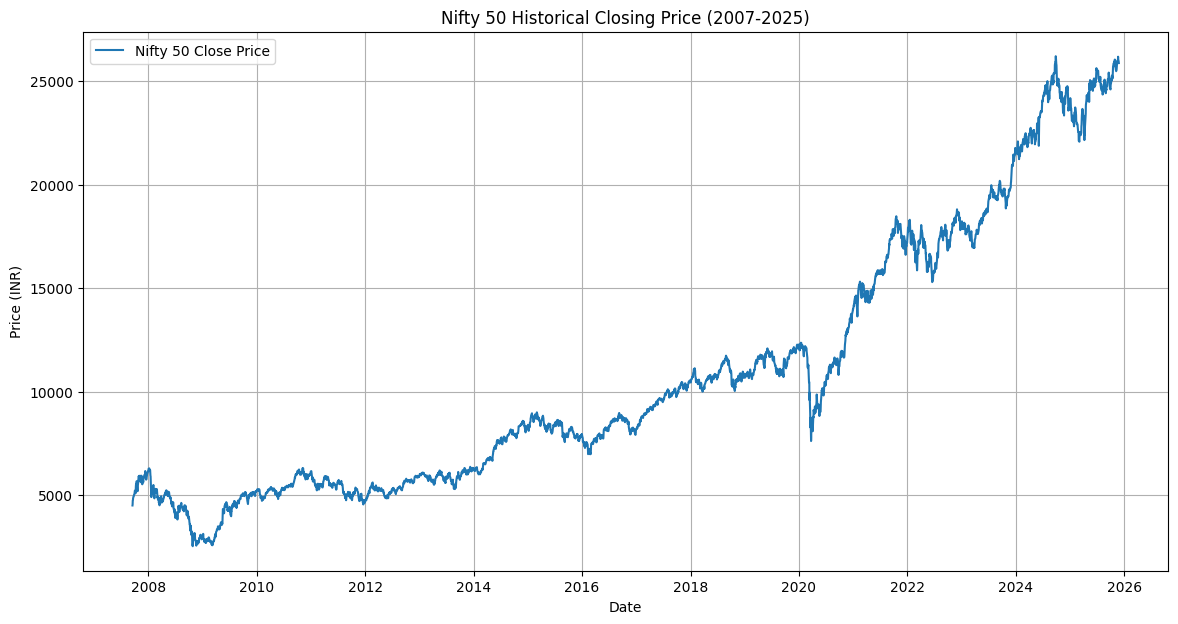

In [5]:
# Visualize Closing Price Trend
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Nifty 50 Close Price')
plt.title('Nifty 50 Historical Closing Price (2007-2025)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

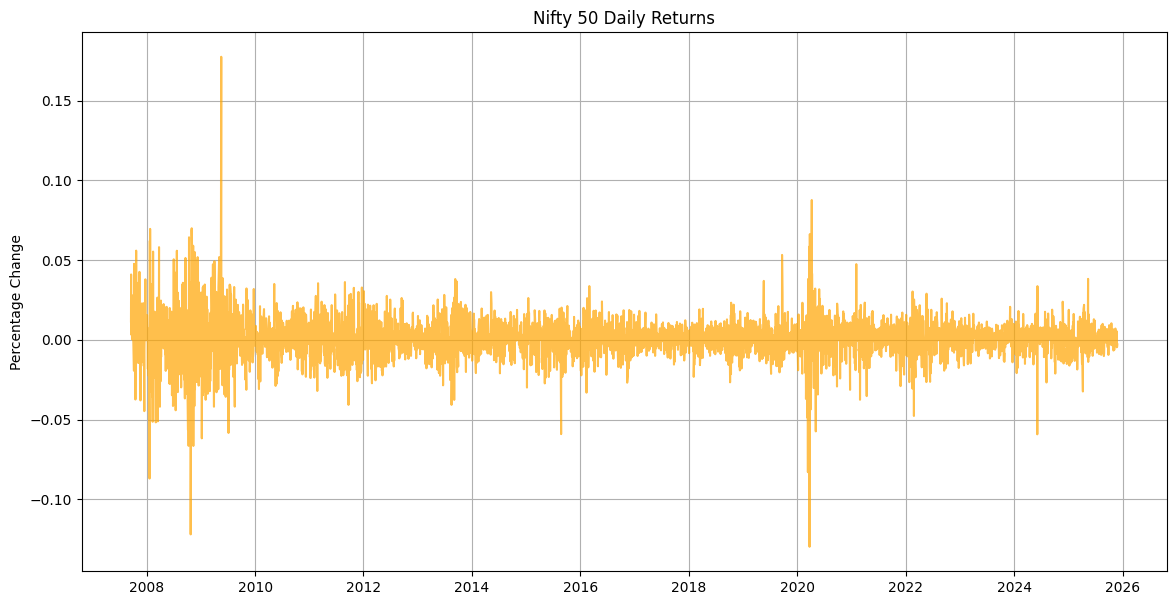

In [6]:
# Calculate Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(df['Daily_Return'], color='orange', alpha=0.7)
plt.title('Nifty 50 Daily Returns')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

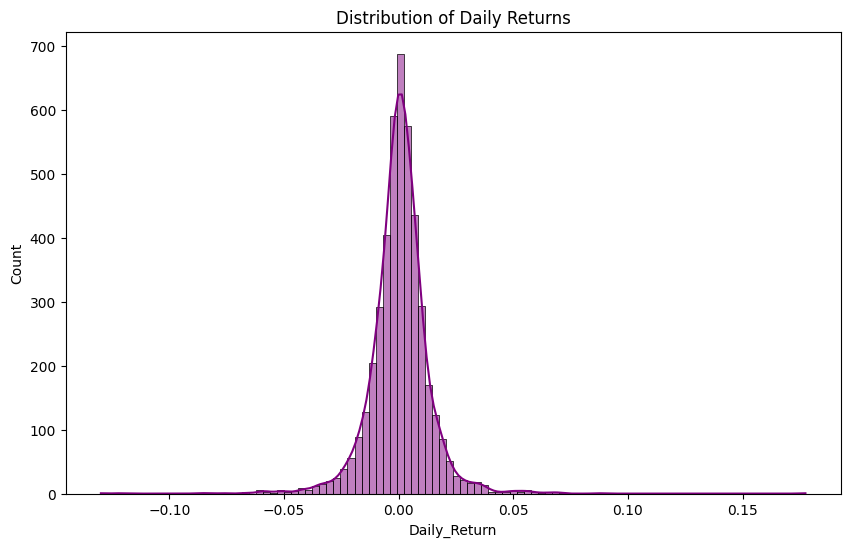

In [7]:
# Distribution of Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.show()